**This is just a practice project to refresh basic skills. The data is acquired from a book that I have been reading named `Models of Learning and Optimization for Data Scientists`. The link to the data is published on the book.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# lets get the data
# the data consists information about the winners of the Oscar in the best movie categroy 
# from 1927-2018
df = pd.read_csv('best-pictures.csv')

In [12]:
# lets take a look at the data
df

,name,year,nominations,rating,duration,genre1,genre2,release,synopsis
0,The Shape of Water,2017,13,7.4,123,Fantasy,Drama,August,At a top secret research facility in the 1960s...
1,Moonlight,2016,8,7.5,111,Drama,NaN,November,A chronicle of the childhood; adolescence and ...
2,Spotlight,2015,6,8.1,128,Crime,Drama,November,The true story of how the Boston Globe uncover...
3,Birdman,2014,9,7.8,119,Comedy,Drama,November,Illustrated upon the progress of his latest Br...
4,12 Years a Slave,2013,9,8.1,134,Biography,Drama,November,In the antebellum United States Solomon Northu...
...,...,...,...,...,...,...,...,...,...
85,Grand Hotel,1931,1,7.6,112,Drama,Romance,September,A group of very different individuals staying ...
86,Cimarron,1930,7,6.0,123,Drama,Western,February,A newspaper editor settles in an Oklahoma boom...
87,All Quiet on the Western Front,1929,4,8.1,136,Drama,War,August,A young soldier faces profound disillusionment...
88,The Broadway Melody,1928,3,6.4,100,Musical,Romance,June,Harriet and Queenie Mahoney a vaudeville act c...


In [4]:
# lets check the shape of the data
df.shape

(90, 9)

In [5]:
# lets get some descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,90.0,1972.444444,26.216948,1927.0,1950.25,1972.5,1994.75,2017.0
nominations,90.0,8.988889,2.671087,1.0,7.00,9.0,11.00,14.0
rating,90.0,7.858889,0.590352,6.0,7.60,8.0,8.20,9.2
duration,90.0,138.033333,31.231089,90.0,118.00,128.5,158.75,238.0


In [6]:
# lets check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         90 non-null     object 
 1   year         90 non-null     int64  
 2   nominations  90 non-null     int64  
 3   rating       90 non-null     float64
 4   duration     90 non-null     int64  
 5   genre1       90 non-null     object 
 6   genre2       81 non-null     object 
 7   release      89 non-null     object 
 8   synopsis     90 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.5+ KB


In [7]:
# lets see if we have any null values
df.isnull().sum()

name           0
year           0
nominations    0
rating         0
duration       0
genre1         0
genre2         9
release        1
synopsis       0
dtype: int64

In [8]:
# lets get value count for some of these coulumns of objectdatatype
for col in df.columns:
    if df[col].dtype == 'O':
        print(df[col].value_counts())
        print()
        print(f'The value count for {col}')

The Greatest Show on Earth        1
Cavalcade                         1
Slumdog Millionaire               1
Million Dollar Baby               1
From Here to Eternity             1
                                 ..
American Beauty                   1
All Quiet on the Western Front    1
Chariots of Fire                  1
Gigi                              1
An American in Paris              1
Name: name, Length: 90, dtype: int64

The value count for name
Drama        37
Biography    16
Comedy       14
Crime         9
Adventure     8
Action        2
Musical       2
Western       1
Fantasy       1
Name: genre1, dtype: int64

The value count for genre1
Drama        42
Romance      18
Family        4
Crime         4
War           3
Comedy        2
Sport         2
History       1
Film-Noir     1
Biography     1
Musical       1
Western       1
Mystery       1
Name: genre2, dtype: int64

The value count for genre2
December     18
October      13
November     11
January      10
February      8

In [67]:
# lets try to answer some questions like what movies and years for max and numbers of nominations,
# user ratings, and durations

# movie and year with maximum number of nominations
print('The movie and year with the highest number of nominations is:')
df[['name', 'year', 'nominations']].loc[df.nominations.idxmax()]


The movie and year with the highest number of nominations is:


name           Titanic
year              1997
nominations         14
Name: 20, dtype: object

In [68]:
# movie and year with the highest number of user rating
print('The movie and year with the highest number of user rating is:')
df[['name', 'year', 'rating']].loc[df.rating.idxmax()]

The movie and year with the highest number of user rating is:


name      The Godfather
year               1972
rating              9.2
Name: 45, dtype: object

In [69]:
# movie and year with the longest duration
print('The movie and year with the longest duration is:')
df[['name',  'duration', 'year']].loc[df.duration.idxmax()]

The movie and year with the longest duration is:


name        Gone With the Wind
duration                   238
year                      1939
Name: 78, dtype: object

In [70]:
# movie and year with the lowest number of nomination
print('The movie and year with the lowest number of nominations is:')
df[['name', 'year',  'nominations']].loc[df.nominations.idxmin()]

The movie and year with the lowest number of nominations is:


name           Grand Hotel
year                  1931
nominations              1
Name: 85, dtype: object

In [71]:
# movie and year with the lowest user rating
print('The movie and year with the lowest number of user rating is:')
df[['name', 'rating', 'year']].loc[df.rating.idxmin()]

The movie and year with the lowest number of user rating is:


name      Cimarron
rating           6
year          1930
Name: 86, dtype: object

In [72]:
# movie and year with the shortest duration
print('The movie and year with the shortest duration is:')
df[['name', 'duration', 'year']].loc[df.duration.idxmin()]

The movie and year with the shortest duration is:


name        Marty
duration       90
year         1955
Name: 62, dtype: object

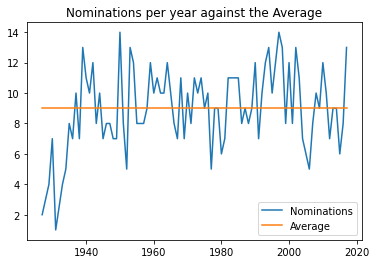

In [9]:
# lets see the number of nominations per year graphically
x = df['year'][::-1]
y = df['nominations'][::-1]
plt.plot(x,y)
avg_y = np.array([y.mean() for i in range(len(y))])
plt.plot(x, avg_y)
plt.legend(('Nominations', 'Average'), loc = 'lower right')
plt.title('Nominations per year against the Average')
plt.show()

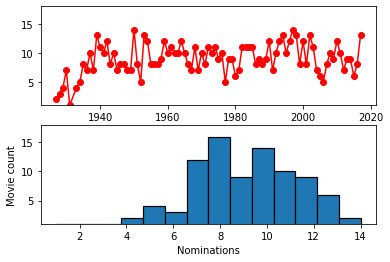

In [10]:
# lets do some additional visualizations
# creating subplots
fig, axs = plt.subplots(2,1)

# plotting the first plot
axs[0].plot(x,y, 'ro-')
axs[0].set_ylim(1,18)

# plotting the second plot
axs[1].hist(y, bins=14, edgecolor= 'black', linewidth=1.2)
axs[1].set_ylim([1, 18])
# setting the x axis and y axis label
axs[1].set_xlabel('Nominations')
axs[1].set_ylabel('Movie count')
plt.show()


In [ ]:
# 